In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsRegressor

# Importing and splitting the data 

In [2]:
data = np.genfromtxt("fuel_data.csv", delimiter = ',') 
X = data.T[0:7].T
Y = data.T[-1].T

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.75, random_state= 42)

print np.shape(X_train)
print np.shape(X_test)
print np.shape(Y_train)
print np.shape(Y_test)

(98L, 7L)
(294L, 7L)
(98L,)
(294L,)


# Using cross validation for tuning the hyperparameters 

In [3]:
cv = [] 
mse = []   
k_list = [] 
mse_tr = [] 
for k in range(1,50): 
    neigh = KNeighborsRegressor(n_neighbors=k) 
    cv.append(np.mean(-cross_val_score(neigh, X, Y, cv = 4, scoring = 'neg_mean_squared_error')))  #cross validation error
    neigh.fit(X_train,Y_train) 
    Y_pred = neigh.predict(X_test) 
    Y_pred_train = neigh.predict(X_train)   
    mse.append(mean_squared_error(Y_test,Y_pred))              #error on test data
    mse_tr.append(mean_squared_error(Y_train,Y_pred_train))    #error on train data
    k_list.append(k)   

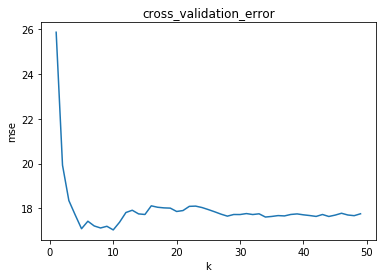

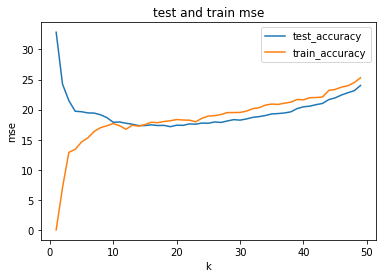

In [4]:
plt.plot(k_list,cv)
plt.title('cross_validation_error') 
plt.xlabel('k')
plt.ylabel('mse')
plt.show()

plt.plot(k_list,mse, label = 'test_accuracy')
plt.plot(k_list,mse_tr,label = 'train_accuracy')
plt.title('test and train mse')
plt.xlabel('k') 
plt.ylabel('mse')  
plt.legend() 
plt.show()  

#print min(cv)
#print max(r2)
#print k_list[cv.index(min(cv))] 

# Creating the model class for regression

In [5]:
neigh = KNeighborsRegressor(n_neighbors= 10) 

In [6]:
neigh.fit(X_train,Y_train)     #training the model

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=10, p=2,
          weights='uniform')

# Getting the predictions

In [7]:
Y_pred = neigh.predict(X_test)
Y_pred_train = neigh.predict(X_train)

# MSE and R2

In [8]:
print("Mean squared error (train): %.8f"
      % mean_squared_error(Y_train,Y_pred_train))
print("R2(train): %.2f"
      % r2_score(Y_train,Y_pred_train))

Mean squared error (train): 17.68262143
R2(train): 0.71


In [9]:
print("Mean squared error (test): %.8f"
      % mean_squared_error(Y_test,Y_pred))
print("R2(test): %.2f"
      % r2_score(Y_test,Y_pred))

Mean squared error (test): 17.89859422
R2(test): 0.70


# Mean Absolute Error

In [10]:
def max_abs_error(data1,data2):
    Y_error = []
    for i in range(len(data1)):
        Y_error.append(100*abs(data1[i] - data2[i])/data1[i])
    return Y_error

In [11]:
MAE_test = max_abs_error(Y_test, Y_pred)
MAE_train = max_abs_error(Y_train, Y_pred_train)
print max(MAE_test)
print max(MAE_train)

72.3888888889
37.5


# Maximum Absolute Error

In [12]:
print("mean_absolute_error(test): %.2f"
      % mean_absolute_error(Y_test, Y_pred)) 

print("mean_absolute_error(train): %.2f"
      % mean_absolute_error(Y_train, Y_pred_train))   

mean_absolute_error(test): 3.23
mean_absolute_error(train): 3.04
